<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Exploración-de-datos" data-toc-modified-id="Exploración-de-datos-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Exploración de datos</a></span></li><li><span><a href="#Modelos-predictivos" data-toc-modified-id="Modelos-predictivos-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Modelos predictivos</a></span><ul class="toc-item"><li><span><a href="#Monta-un-modelo-con-un-solo-predictor:-HouseAge" data-toc-modified-id="Monta-un-modelo-con-un-solo-predictor:-HouseAge-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Monta un modelo con un solo predictor: <code>HouseAge</code></a></span></li><li><span><a href="#Monta-un-modelo-con-un-solo-predictor:-MedInc" data-toc-modified-id="Monta-un-modelo-con-un-solo-predictor:-MedInc-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Monta un modelo con un solo predictor: <code>MedInc</code></a></span></li><li><span><a href="#Monta-un-modelo-con-los-3-predictores-MedInc,-HouseAge,-AveRooms" data-toc-modified-id="Monta-un-modelo-con-los-3-predictores-MedInc,-HouseAge,-AveRooms-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Monta un modelo con los 3 predictores <code>MedInc</code>, <code>HouseAge</code>, <code>AveRooms</code></a></span></li><li><span><a href="#Monta-un-modelo-con-todas-las-variables-como-predictoras" data-toc-modified-id="Monta-un-modelo-con-todas-las-variables-como-predictoras-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Monta un modelo con todas las variables como predictoras</a></span></li></ul></li><li><span><a href="#Train/test-split" data-toc-modified-id="Train/test-split-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Train/test split</a></span><ul class="toc-item"><li><span><a href="#Monta-un-modelo-con-todas-las-variables-como-predictoras-y-utilizando-el-paradigma-train/test-split" data-toc-modified-id="Monta-un-modelo-con-todas-las-variables-como-predictoras-y-utilizando-el-paradigma-train/test-split-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Monta un modelo con todas las variables como predictoras y utilizando el paradigma train/test split</a></span></li></ul></li></ul></div>

# Regresión lineal: práctica y ejercicios

**NOTAS**
 - Hay muchas formas de resolver cada problema, encuentra la tuya.
 - Crea las celdas extra que necesites.
 - Recuerda que una celda puede ser de tipo Código, o de tipo Markdown. Utiliza las segundas para escribir texto y explicaciones si lo precisas.
 - Intenta crear variables a la hora de resolver los ejercicios.
 - Puedes apoyarte en internet: todos los programadores lo hacemos a diario.

Importamos el dataset *california housing*

In [1]:
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
california_housing = fetch_california_housing()

In [3]:
print(california_housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [4]:

# Create a DataFrame from the dataset
data = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)
data['target']= california_housing.target

# Display the DataFrame
data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


Para nuestro ejercicio de hoy, vamos a eliminar algunos datos de entrada

**El objetivo del ejercicio será predecir `MedHouseVal` en función de otras variables**

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

def linear_regression_model(X, y, random_state=42):
    """
    Apply Linear Regression on the input data and return predicted values and Mean Squared Error (MSE).

    Parameters:
    - X: DataFrame or Series containing features
    - y: Series containing target variable
    - random_state: Random state for reproducibility (default=42)

    Returns:
    - y_pred: Predicted target values
    - mse: Mean Squared Error (MSE)
    """
    # Check if X is a DataFrame or Series
    if isinstance(X, pd.DataFrame):
        X_features = X
    elif isinstance(X, pd.Series):
        X_features = X.values.reshape(-1, 1)  # Reshape only if X is a Series
    else:
        raise ValueError("X must be a DataFrame or Series")

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_features, y, test_size=0.2, random_state=random_state)

    # Create a Linear Regression model
    model = LinearRegression()

    # Train the model on the training data
    model.fit(X_train, y_train)

    # Make predictions on the testing data
    y_pred = model.predict(X_test)

    # Calculate Mean Squared Error (MSE)
    mse = mean_squared_error(y_test, y_pred)

    return y_pred, mse, y_test



**La métrica a optimizar será el root mean squared error (RMSE)**

## Exploración de datos

Cada fila es un bloque de casas de California

Explora el dataset como consideres, acompañándo el análisis de plots univariantes / bivariantes

Presta especial atención a las variables `MedInc`, `HouseAge`, `AveRooms` y `MedHouseVal`

In [6]:
data.describe()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


## Modelos predictivos

(Entrena y evalúa los siguientes modelos sin hacer train/test split o cross validation)

(Esto tiene poco sentido hacerlo en la realidad, pero simplifica el ejercicio)

### Monta un modelo con un solo predictor: `HouseAge`

Y evalúa su performance

In [7]:
#calculating y_pred and mse for the regretion model with only HouseAge
y_pred_house_age, mse_house_age , y_test = linear_regression_model(data['HouseAge'], data['target'])


In [8]:
mse_house_age

1.2939617265100323

### Monta un modelo con un solo predictor: `MedInc`

Y evalúa su performance

In [9]:
#calculating y_pred and mse for the regretion model with only MedInc
y_pred_med_inc, mse_med_inc, y_test = linear_regression_model(data['MedInc'], data['target'])
mse_med_inc

0.7091157771765549

### Monta un modelo con los 3 predictores `MedInc`, `HouseAge`, `AveRooms`

Y evalúa su performance

In [10]:
#calculating y_pred and mse for the regretion model with only  MedInc, HouseAge, AveRooms
y_pred_3, mse_3 ,y_test = linear_regression_model(data[['MedInc', 'HouseAge', 'AveRooms']], data['target'])
mse_3

0.6589108649336336

### Monta un modelo con todas las variables como predictoras

Y evalúa su performance

In [11]:
#calculating y_pred and mse for the regretion model with all
y_pred_all, mse_all, y_test = linear_regression_model(data.drop(columns='target'), data['target'])
mse_3

0.6589108649336336

En qué bloques de casas específicos comete mayor error tu modelo?

## Train/test split

### Monta un modelo con todas las variables como predictoras y utilizando el paradigma train/test split

<Axes: xlabel='Test', ylabel='HouseAge'>

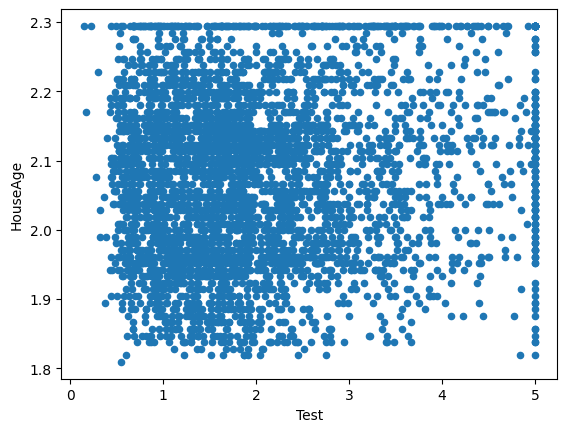

In [19]:
predictions = pd.DataFrame({'Test':y_test,
    'HouseAge':y_pred_house_age,
    'MedInc': y_pred_med_inc,
    '3_variables':y_pred_3,
    'all_models': y_pred_all})

predictions.plot.scatter(x = 'Test', y= 'HouseAge')